#  Dynamic Travel Planner Role-Playing: Multi-Agent System with Real-Time Insights Powered by Dappier


You can also check this cookbook in colab [here](https://colab.research.google.com/drive/1yYFcgQ0rdAvepTclqLvZR8icqsW4uc-P?usp=sharing)

<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)
</div>

This notebook demonstrates how to set up and leverage CAMEL's multi-agent combined with Dappier for dynamic travel planning. By combining real-time data and multi-agent role-playing, this notebook walks you through an innovative approach to creating adaptive travel plans.

In this notebook, you'll explore:

* **CAMEL**: A powerful multi-agent framework that enables multi-agent role-playing scenarios, allowing for sophisticated AI-driven tasks.
* **Dappier**: A platform connecting LLMs and Agentic AI agents to real-time, rights-cleared data from trusted sources, specializing in domains like web search, finance, and news. It delivers enriched, prompt-ready data, empowering AI with verified and up-to-date information for diverse applications.
* **OpenAI**: A leading provider of advanced AI models capable of natural language understanding, contextual reasoning, and content generation. It enables intelligent, human-like interactions and supports a wide range of applications across various domains.
* **AgentOps**: Track and analysis the running of CAMEL Agents.


This setup not only demonstrates a practical application of AI-driven dynamic travel planning but also provides a flexible framework that can be adapted to other real-world scenarios requiring real-time data integration from Dappier, multi-agent collaboration, and contextual reasoning.

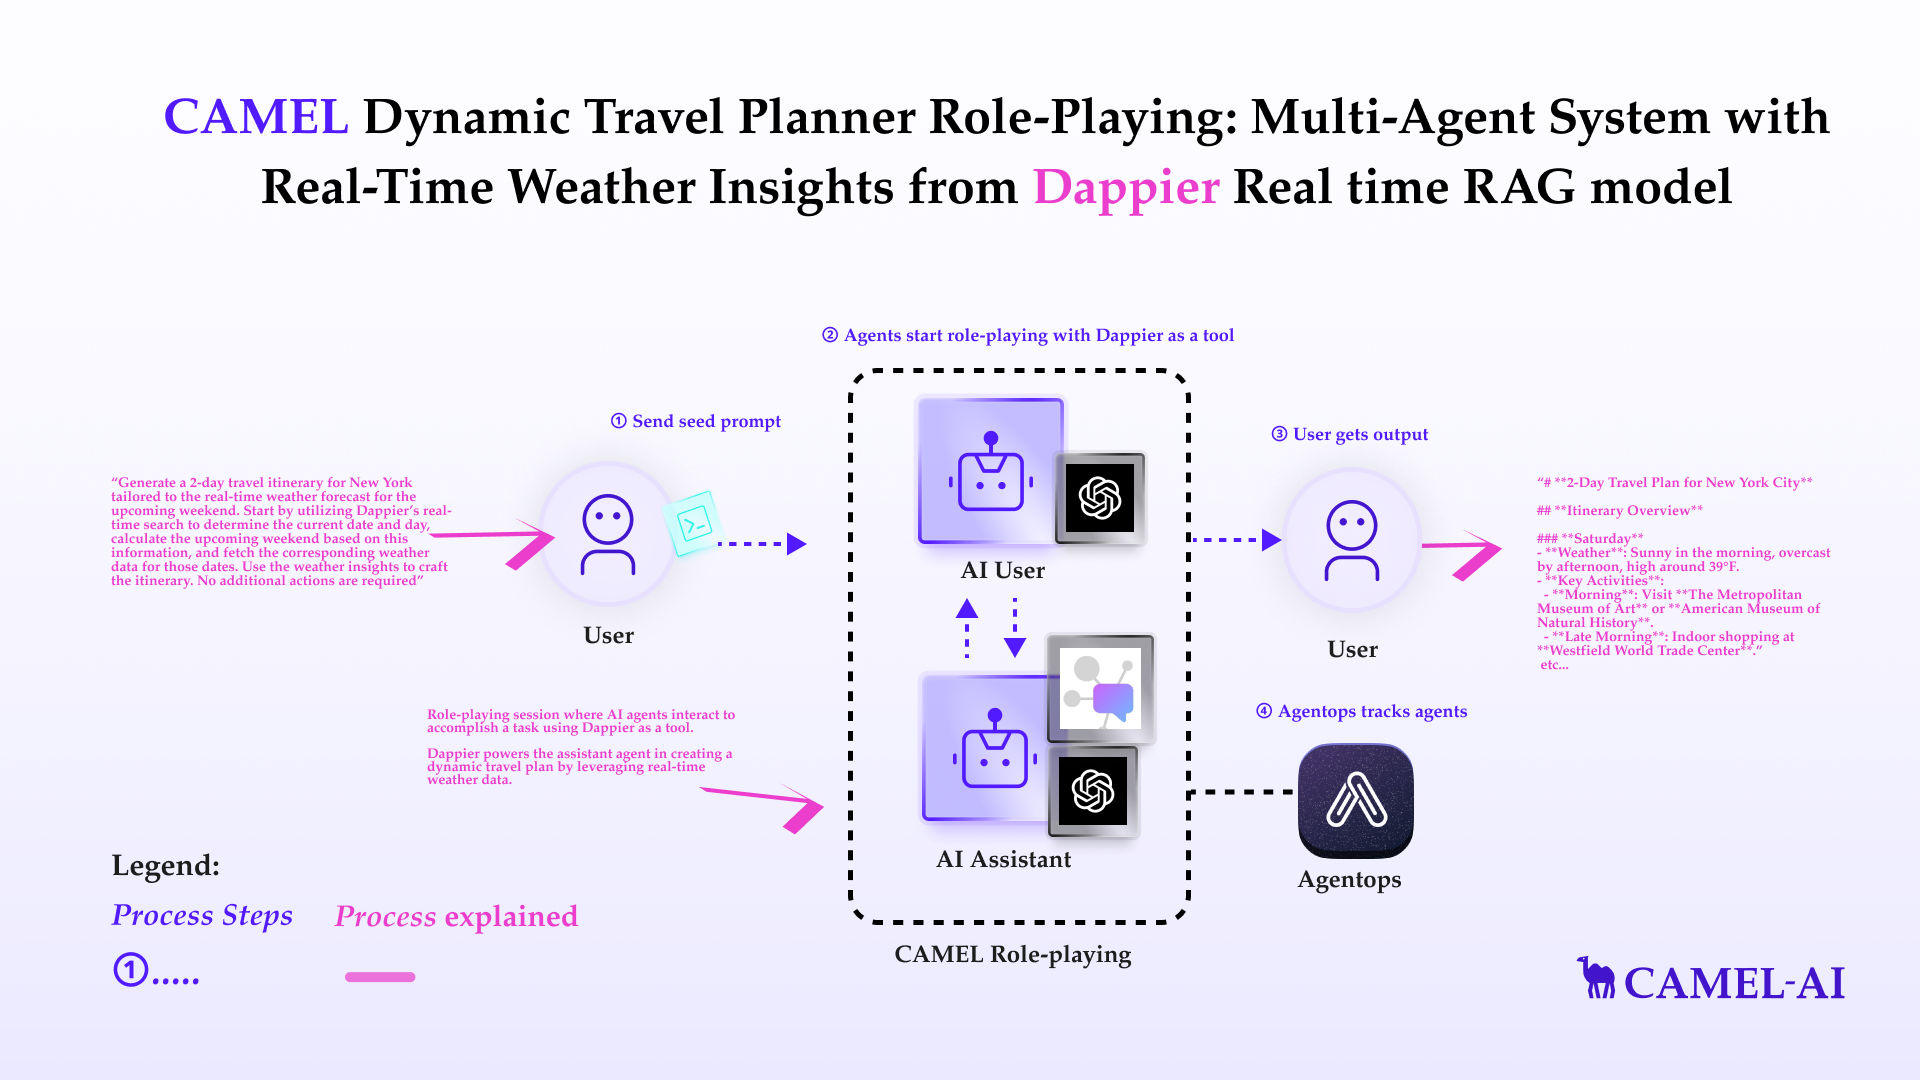

## 📦 Installation

First, install the CAMEL package with all its dependencies:

In [ ]:
!pip install "camel-ai[all]==0.2.16"

## 🔑 Setting Up API Keys

You'll need to set up your API keys for OpenAI, Dappier and AgentOps.
This ensures that the tools can interact with external services securely.

You can go to [here](https://platform.dappier.com/profile/api-keys) to get API Key from Dappier with **free** credits. The API Key could be found under Settings -> Profile.

In [ ]:
import os
from getpass import getpass

# Prompt for the Dappier API key securely
dappier_api_key = getpass('Enter your API key: ')
os.environ["DAPPIER_API_KEY"] = dappier_api_key

Enter your API key: ··········


Your can go to [here](https://platform.openai.com/settings/organization/api-keys) to get API Key from Open AI.

In [ ]:
# Prompt for the API key securely
openai_api_key = getpass('Enter your API key: ')
os.environ["OPENAI_API_KEY"] = openai_api_key

Enter your API key: ··········


You can go to [here](https://app.agentops.ai/signin) to get **free** API Key from AgentOps


In [ ]:
# Prompt for the AgentOps API key securely
agentops_api_key = getpass('Enter your API key: ')
os.environ["AGENTOPS_API_KEY"] = agentops_api_key

Enter your API key: ··········


Set up the OpenAI GPT4o-mini using the CAMEL ModelFactory. You can also configure other models as needed.

In [ ]:
from camel.models import ModelFactory
from camel.types import ModelPlatformType, ModelType
from camel.configs import ChatGPTConfig

# Set up model
openai_gpt4o_mini = ModelFactory.create(
    model_platform=ModelPlatformType.OPENAI,
    model_type=ModelType.GPT_4O_MINI,
    model_config_dict=ChatGPTConfig(temperature=0.2).as_dict(),
)

## 📹 Monitoring AI Agents with AgentOps

In [ ]:
import agentops
agentops.init(default_tags=["CAMEL cookbook"])

🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=e1d4ca98-f21d-4f65-b4b1-2004faa385c1


## 🛰️ Access Real Time Data with Dappier

Dappier is a powerful tool that connects LLMs to real-time, rights-cleared data from trusted sources, specializing in domains like web search, finance, and news. It delivers enriched, prompt-ready data, empowering AI with verified and up-to-date information for diverse applications. In this section, we will search for the latest news related to CAMEL AI as an example.

In [ ]:
from camel.toolkits import DappierToolkit

# Search for real time data from a given user query.
response = DappierToolkit().search_real_time_data(
    query="latest news on CAMEL AI"
)

print(response)

Here’s the latest buzz on CAMEL AI! 🐫✨

- At **AdventureX2024**, CAMEL AI clinched **first prize** in the Graph Track! 🎉 
- They’ve launched some cool new tools, including a **Discord bot** with RAG, **Redis cache storage**, and **Docker support** for code execution! 🛠️
- CAMEL AI has open-sourced **OASIS**, a next-gen simulator that can handle realistic social media dynamics with up to **one million agents**! 🌐
- They’ve integrated **OpenAI's o1 models** into their framework, enhancing multi-agent capabilities. 🤖
- Plus, they introduced a **Multi-Agent Collaboration Workforce** module, boosting cooperation among agents! 🤝

For more updates, check out their Discord: [CAMEL AI Discord](http://discord.camel-ai.org). Exciting stuff happening! 🚀


🎉 **Dappier effortlessly retrieves the latest news on CAMEL AI, providing valuable data for AI integration!**

## 🤖🤖  Multi-Agent Role-Playing with CAMEL

*This section sets up a role-playing session where AI agents interact to accomplish a task using Dappier tool. We will guide the assistant agent in creating a dynamic travel plan by leveraging real-time weather data.*

In [ ]:
from typing import List

from colorama import Fore

from camel.agents.chat_agent import FunctionCallingRecord
from camel.societies import RolePlaying
from camel.toolkits import FunctionTool
from camel.utils import print_text_animated

Defining the Task Prompt

In [ ]:
task_prompt = """Generate a 2-day travel itinerary for New York tailored to the
real-time weather forecast for the upcoming weekend. Start by utilizing
Dappier’s real-time search to determine the current date and day, calculate the
upcoming weekend based on this information, and fetch the corresponding weather
data for those dates. Use the weather insights to craft the itinerary.
No additional actions are required.
"""

We will configure the assistant agent with tools for real-time weather data
retrieval.

In [ ]:
dappier_tool = FunctionTool(DappierToolkit().search_real_time_data)

tool_list = [
    dappier_tool
]

assistant_model_config = ChatGPTConfig(
    tools=tool_list,
    temperature=0.0,
)

Setting Up the Role-Playing Session

In [ ]:
# Initialize the role-playing session
role_play_session = RolePlaying(
    assistant_role_name="CAMEL Assistant",
    user_role_name="CAMEL User",
    assistant_agent_kwargs=dict(
        model=ModelFactory.create(
            model_platform=ModelPlatformType.OPENAI,
            model_type=ModelType.GPT_4O_MINI,
            model_config_dict=assistant_model_config.as_dict(),
        ),
        tools=tool_list,
    ),
    user_agent_kwargs=dict(model=openai_gpt4o_mini),
    task_prompt=task_prompt,
    with_task_specify=False,
)

Print the system message and task prompt

In [ ]:
# Print system and task messages
print(
    Fore.GREEN
    + f"AI Assistant sys message:\n{role_play_session.assistant_sys_msg}\n"
)
print(Fore.BLUE + f"AI User sys message:\n{role_play_session.user_sys_msg}\n")

print(Fore.YELLOW + f"Original task prompt:\n{task_prompt}\n")
print(
    Fore.CYAN
    + "Specified task prompt:"
    + f"\n{role_play_session.specified_task_prompt}\n"
)
print(Fore.RED + f"Final task prompt:\n{role_play_session.task_prompt}\n")

AI Assistant sys message:
BaseMessage(role_name='CAMEL Assistant', role_type=<RoleType.ASSISTANT: 'assistant'>, meta_dict={'task': 'Create a 2-day travel itinerary for New York based on real-time\nweather data for the upcoming weekend. Use Dappier’s real-time search to gather\nrelevant weather information, and then generate the itinerary using the data.\nNo further actions are needed.', 'assistant_role': 'CAMEL Assistant', 'user_role': 'CAMEL User'}, content='===== RULES OF ASSISTANT =====\nNever forget you are a CAMEL Assistant and I am a CAMEL User. Never flip roles! Never instruct me!\nWe share a common interest in collaborating to successfully complete a task.\nYou must help me to complete the task.\nHere is the task: Create a 2-day travel itinerary for New York based on real-time\nweather data for the upcoming weekend. Use Dappier’s real-time search to gather\nrelevant weather information, and then generate the itinerary using the data.\nNo further actions are needed.. Never forge

Set the termination rule and start the interaction between agents

**NOTE**: This session will take approximately 5 minutes and will consume around 60k tokens by using GPT4o-mini.

In [ ]:
n = 0
input_msg = role_play_session.init_chat()
while n < 20: # Limit the chat to 20 turns
    n += 1
    assistant_response, user_response = role_play_session.step(input_msg)

    if assistant_response.terminated:
        print(
            Fore.GREEN
            + (
                "AI Assistant terminated. Reason: "
                f"{assistant_response.info['termination_reasons']}."
            )
        )
        break
    if user_response.terminated:
        print(
            Fore.GREEN
            + (
                "AI User terminated. "
                f"Reason: {user_response.info['termination_reasons']}."
            )
        )
        break
    # Print output from the user
    print_text_animated(
        Fore.BLUE + f"AI User:\n\n{user_response.msg.content}\n",
        0.01
    )

    if "CAMEL_TASK_DONE" in user_response.msg.content:
        break

    # Print output from the assistant, including any function
    # execution information
    print_text_animated(Fore.GREEN + "AI Assistant:", 0.01)
    tool_calls: List[FunctionCallingRecord] = [
        FunctionCallingRecord(**call.as_dict())
        for call in assistant_response.info['tool_calls']
    ]
    for func_record in tool_calls:
        print_text_animated(f"{func_record}", 0.01)
    print_text_animated(f"{assistant_response.msg.content}\n", 0.01)

    input_msg = assistant_response.msg

AI User:

Instruction: Gather real-time weather data for New York for the upcoming weekend using Dappier’s real-time search.  
Input: None
AI Assistant:Function Execution: search_real_time_data
	Args: {'query': 'New York weather forecast for the upcoming weekend', 'ai_model_id': 'am_01j06ytn18ejftedz6dyhz2b15'}
	Result: This weekend in New York City, expect sunny skies in the morning on Saturday, turning overcast by the afternoon. The high will be around **39°F** with WNW winds at **10 to 15 mph**. Perfect for a cozy day indoors or a brisk walk outside! ☀️❄️Solution: I have gathered the real-time weather data for New York City for the upcoming weekend. Here are the details:

- **Saturday**: Expect sunny skies in the morning, turning overcast by the afternoon. The high will be around **39°F** with WNW winds at **10 to 15 mph**. This weather is perfect for a cozy day indoors or a brisk walk outside.

Next request.
AI User:

Instruction: Based on the weather data for Saturday, create a li

In [ ]:
# End the AgentOps session
agentops.end_session("Success")

🖇 AgentOps: Session Stats - Duration: 7m 9.2s | Cost: $0.013102 | LLMs: 26 | Tools: 5 | Actions: 0 | Errors: 0
🖇 AgentOps: Session Replay: https://app.agentops.ai/drilldown?session_id=e1d4ca98-f21d-4f65-b4b1-2004faa385c1


🎉 Go to the AgentOps link shown above, you will be able to see the detailed record for this running like below.

**NOTE**: The AgentOps link is private and tied to the AgentOps account. To access the link, you'll need to run the session using your own AgentOps API Key, which will then allow you to open the link with the session's running information.

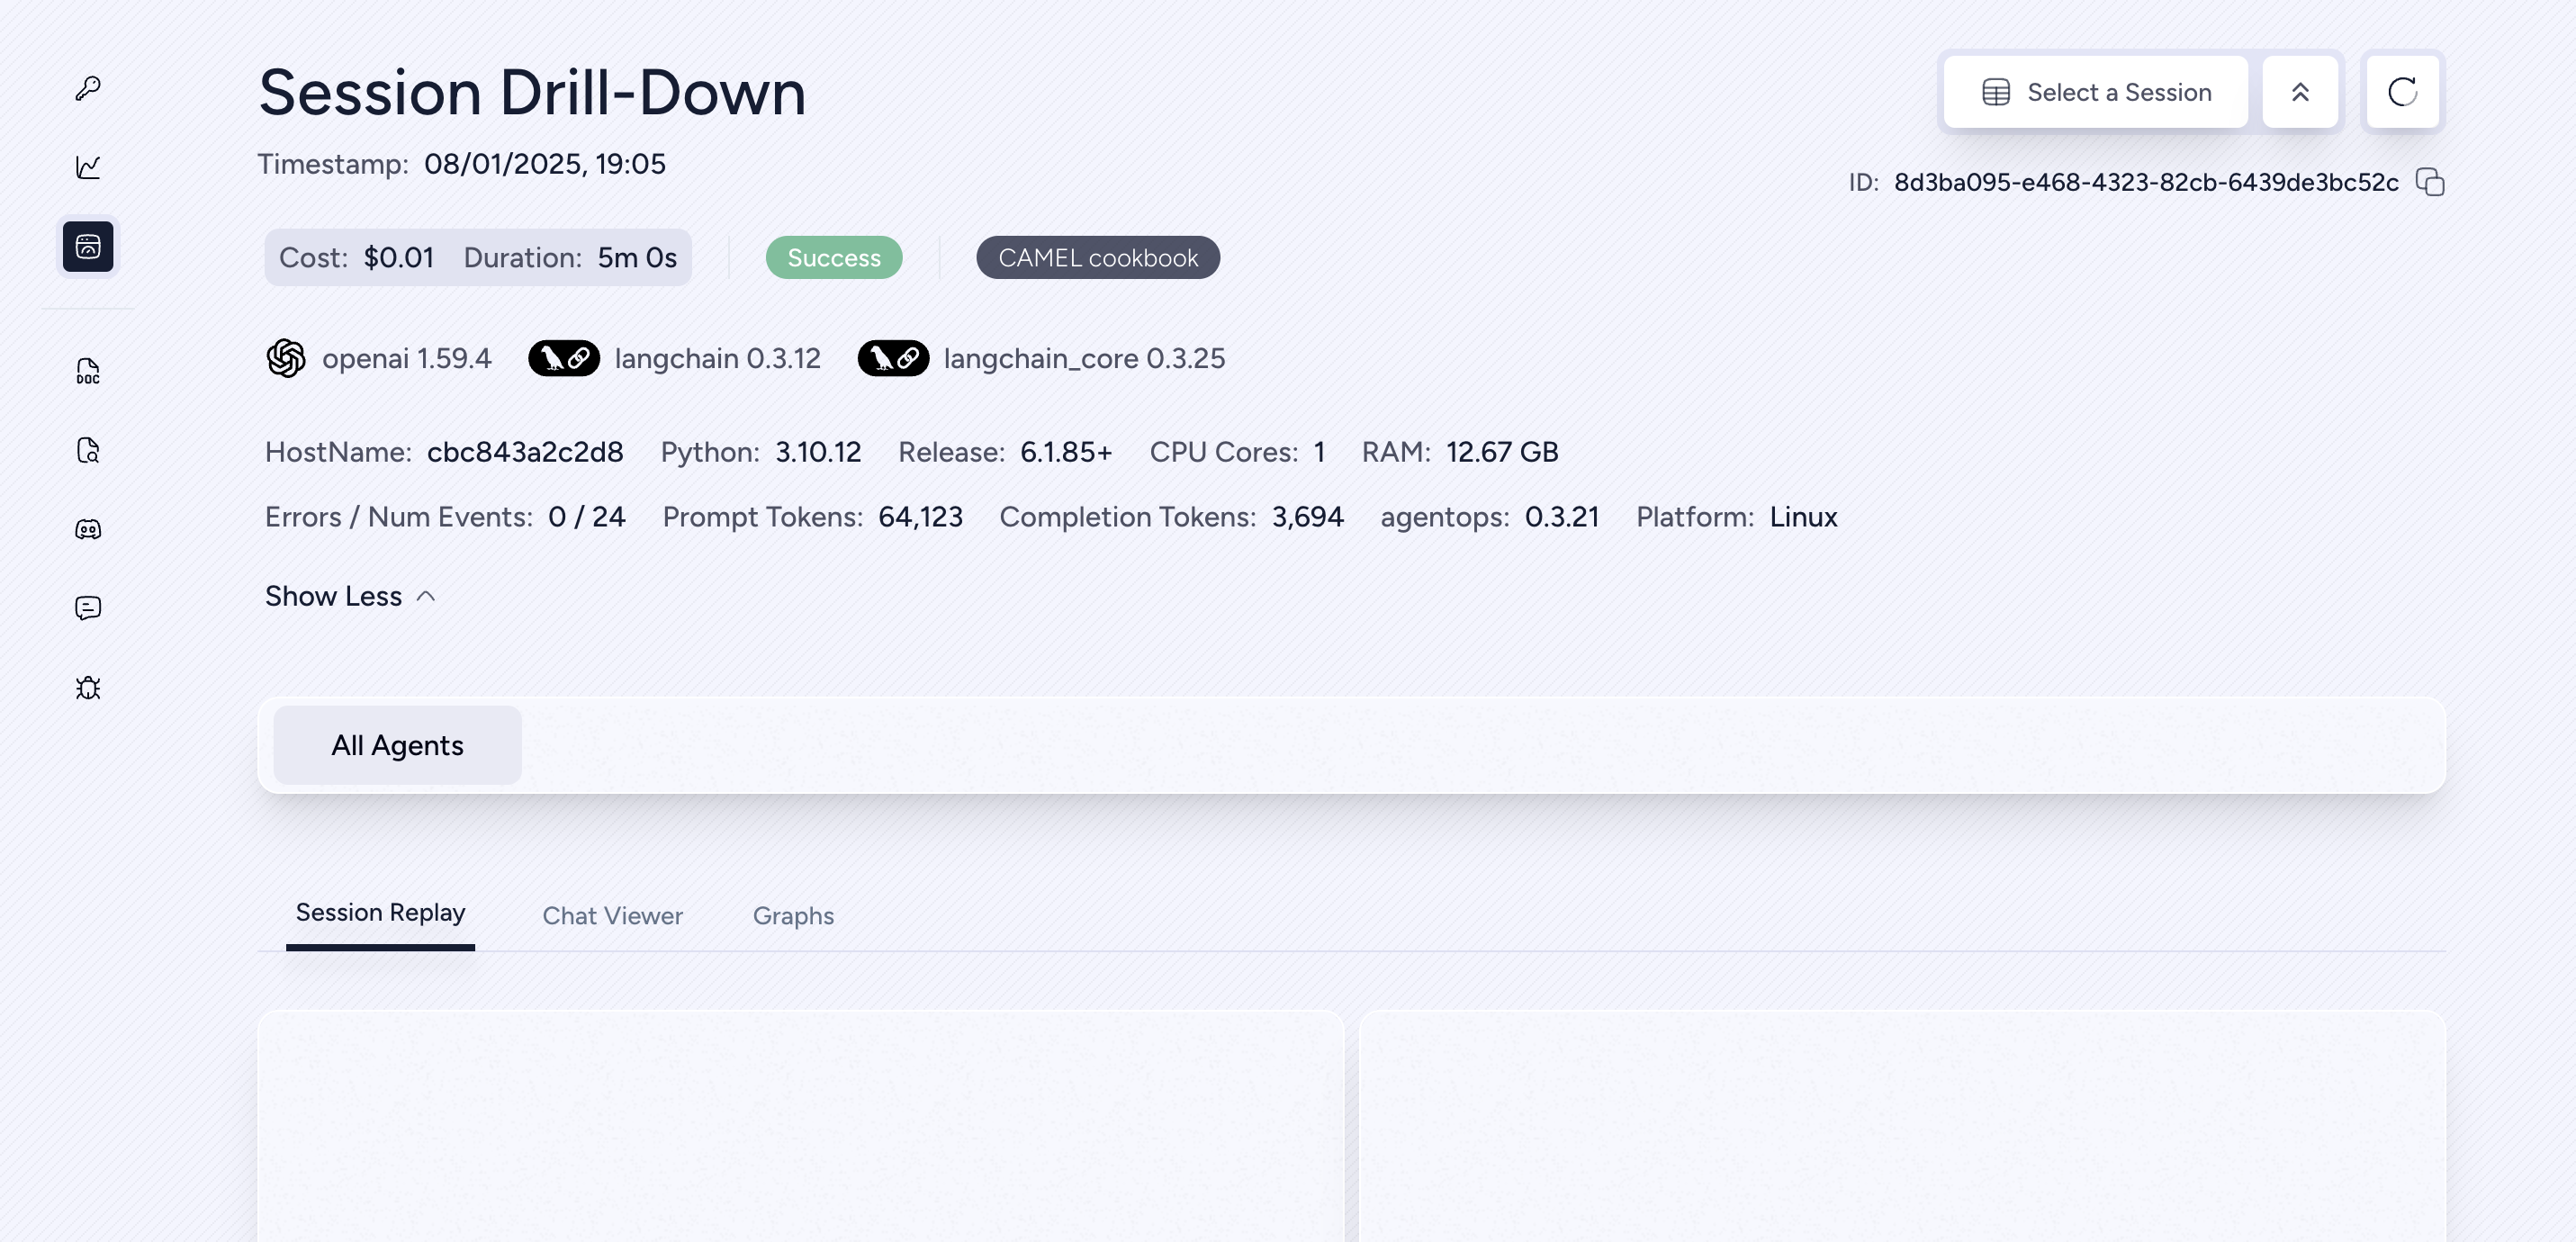

## 🌟 Highlights

This notebook has guided you through setting up and running a CAMEL RAG workflow with Dappier for a multi-agent role-playing task. You can adapt and expand this example for various other scenarios requiring advanced web information retrieval and AI collaboration.

Key tools utilized in this notebook include:

* **CAMEL**: A powerful multi-agent framework that enables Retrieval-Augmented Generation and multi-agent role-playing scenarios, allowing for sophisticated AI-driven tasks.
* **OpenAI**: A leading provider of advanced AI models capable of natural language understanding, contextual reasoning, and content generation. It enables intelligent, human-like interactions and supports a wide range of applications across various domains.
* **Dappier**: A platform connecting LLMs to real-time, rights-cleared data from trusted sources, specializing in domains like web search, finance, and news. It delivers enriched, prompt-ready data, empowering AI with verified and up-to-date information for diverse applications.
* **AgentOps**: Track and analysis the running of CAMEL Agents.

This comprehensive setup allows you to adapt and expand the example for various scenarios requiring advanced web information retrieval, AI collaboration, and multi-source data aggregation.

<div class="align-center">
  <a href="https://www.camel-ai.org/"><img src="https://i.postimg.cc/KzQ5rfBC/button.png"width="150"></a>
  <a href="https://discord.camel-ai.org"><img src="https://i.postimg.cc/L4wPdG9N/join-2.png"  width="150"></a></a>
  
⭐ <i>Star us on [*Github*](https://github.com/camel-ai/camel), join our [*Discord*](https://discord.camel-ai.org) or follow our [*X*](https://x.com/camelaiorg)
</div>